In [6]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
[file for file in os.listdir() if file.endswith('.jpg')]

['gray_image.jpg', 'image_Venice_sharp.jpg', 'nature_bw.jpg']

In [7]:
image = cv2.imread('gray_image.jpg', cv2.IMREAD_GRAYSCALE)

#aspect_ratio = float(image.shape[1])/float(image.shape[0])
#window_width = 500/aspect_ratio
#image = cv2.resize(image, (int(500),int(window_width)))

#image = self.resize(image, 500)

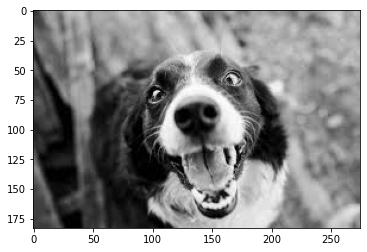

In [8]:
plt.imshow(image, cmap='gray')

In [9]:
filter_blur = np.array([[1,1,1],[1,1,1],[1,1,1]]) / 9
print(filter_blur)
blur_matrix = cv2.filter2D(image, -1, filter_blur)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


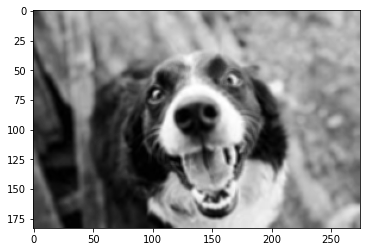

In [10]:
plt.imshow(blur_matrix, cmap='gray')

9052262

In [19]:
blur_matrix.shape

(180, 281)

In [20]:
image.shape

(180, 281)

In [30]:
filter_blur // 2

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [33]:
image_height, image_width = image.shape
filter_height, filter_width = filter_blur.shape

padding_height = filter_height // 2
padding_width = filter_width // 2

padded_image = np.pad(image, ((padding_height, padding_height), (padding_width, padding_width)), mode='constant')
padded_image

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0, 153, 153, ..., 123, 121,   0],
       [  0, 153, 153, ..., 123, 121,   0],
       ...,
       [  0, 194, 194, ..., 180, 180,   0],
       [  0, 194, 194, ..., 180, 180,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [34]:
i = 0
j = 0
region = padded_image[i:i+filter_height, j:j+filter_width]
region

array([[  0,   0,   0],
       [  0, 153, 153],
       [  0, 153, 153]], dtype=uint8)

In [38]:
padded_image[i, j]

0

In [37]:
np.sum(region * filter_blur)

68.0

In [36]:
region * filter_blur

array([[ 0.,  0.,  0.],
       [ 0., 17., 17.],
       [ 0., 17., 17.]])

In [ ]:
output_matrix[i, j] = np.sum(region * filter_matrix)

In [22]:
import numpy as np

def convolution2d(image_matrix, filter_matrix):
    try:
       
        
        return output_matrix
    except Exception as e:
        print(f"Error: {e}")
        return None


In [41]:
print(blur_matrix.sum())
print(blur_matrix_f.sum())

9052262
9000260.0


In [24]:
blur_matrix_f = convolution2d(image, filter_blur)

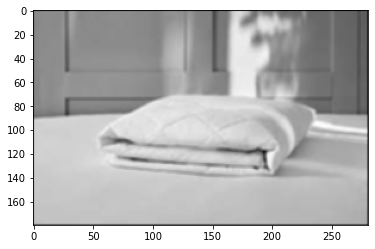

In [25]:
plt.imshow(blur_matrix_f, cmap='gray')

In [28]:
print(blur_matrix_f.shape)
blur_matrix_f

(180, 281)


array([[ 68.        , 102.        , 102.22222222, ...,  81.33333333,
         81.55555556,  54.22222222],
       [102.        , 153.        , 153.33333333, ..., 122.        ,
        122.33333333,  81.33333333],
       [102.        , 153.        , 153.33333333, ..., 122.        ,
        122.33333333,  81.33333333],
       ...,
       [129.33333333, 194.        , 194.        , ..., 180.        ,
        180.        , 120.        ],
       [129.33333333, 194.        , 194.        , ..., 180.        ,
        180.        , 120.        ],
       [ 86.22222222, 129.33333333, 129.33333333, ..., 120.        ,
        120.        ,  80.        ]])

In [29]:
print(blur_matrix.shape)
blur_matrix

(180, 281)


array([[153, 153, 153, ..., 122, 122, 122],
       [153, 153, 153, ..., 122, 122, 122],
       [153, 153, 153, ..., 122, 122, 122],
       ...,
       [194, 194, 194, ..., 180, 180, 180],
       [194, 194, 194, ..., 180, 180, 180],
       [194, 194, 194, ..., 180, 180, 180]], dtype=uint8)

In [42]:
def gaussian_blur(image_matrix, kernel_size, sigma):
    try:
        
        kernel = gaussian_kernel(kernel_size, sigma)
        
        blurred_image = convolution2d(image_matrix, kernel)
        
        return blurred_image
    except Exception as e:
        print(f"Error: {e}")
        return None

def gaussian_kernel(kernel_size, sigma):
    # Create a 2D Gaussian kernel
    kernel = np.fromfunction(lambda x, y: (1/(2*np.pi*sigma**2)) * np.exp(-((x-(kernel_size-1)/2)**2 + (y-(kernel_size-1)/2)**2)/(2*sigma**2)), (kernel_size, kernel_size))
    return kernel / np.sum(kernel)  # Normalize the kernel

In [79]:
g_image = gaussian_blur(image, 5, 10)

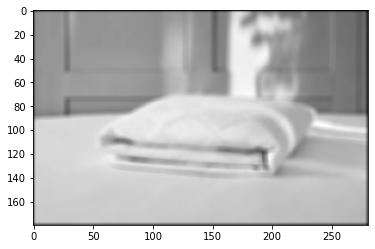

In [80]:
plt.imshow(g_image, cmap='gray')

In [82]:
g_image[0]

array([ 55.26402595,  73.86520856,  92.19302578,  92.31442986,
        92.55422856,  92.79402726,  93.03443147,  93.27602862,
        93.51643283,  93.63723141,  93.75623153,  93.75623153,
        93.75623153,  93.75623153,  93.63723141,  93.51643283,
        93.39502874,  93.27423017,  93.15523004,  93.15523004,
        93.15523004,  93.15523004,  93.63123053,  94.47142521,
        94.72443667,  91.15984645,  88.00166823,  86.25694129,
        87.42778305,  89.54500066,  95.47328582, 100.72345223,
       103.66045601, 102.93786395, 101.45445312,  99.52844561,
        97.40203815,  95.47603064,  93.91282489,  92.87123172,
        92.27222818,  92.15202211,  92.19302578,  92.31442986,
        92.55422856,  92.79402726,  93.03443147,  93.27602862,
        93.51643283,  93.51823128,  93.51643283,  93.27602862,
        93.03443147,  92.79402726,  92.67322868,  92.55422856,
        92.55422856,  92.55422856,  92.55422856,  92.55422856,
        92.55422856,  92.55422856,  92.91122893,  93.27

In [23]:
import cv2

def image_to_matrix(image_path):
    try:
        # Read the image
        image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
        num_channels = image.shape[2] if len(image.shape) == 3 else 1
        window_name = 'image'
        cv2.imshow(window_name, image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        
        if num_channels == 1:
            grayscale_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            
            print('Detected the grey image')
            return grayscale_image
        elif num_channels == 3:
            colored_image = cv2.imread(image_path)
            
            print('Detected coloured image')
            return colored_image
        
        return image_matrix
    except Exception as e:
        print(f"Error: {e}")
        return None
    
# Example usage:
image_path = "grey.jpg"
gray_matrix = image_to_matrix(image_path)
if gray_matrix is not None:
    print("Matrix representation of the grayscale image:")
    print(gray_matrix)

Detected coloured image
Matrix representation of the grayscale image:
[[[155 153 153]
  [155 153 153]
  [155 153 153]
  ...
  [125 123 123]
  [125 123 123]
  [123 121 121]]

 [[155 153 153]
  [155 153 153]
  [155 153 153]
  ...
  [125 123 123]
  [125 123 123]
  [123 121 121]]

 [[155 153 153]
  [155 153 153]
  [155 153 153]
  ...
  [125 123 123]
  [125 123 123]
  [123 121 121]]

 ...

 [[196 194 194]
  [196 194 194]
  [196 194 194]
  ...
  [182 180 180]
  [182 180 180]
  [182 180 180]]

 [[196 194 194]
  [196 194 194]
  [196 194 194]
  ...
  [182 180 180]
  [182 180 180]
  [182 180 180]]

 [[196 194 194]
  [196 194 194]
  [196 194 194]
  ...
  [182 180 180]
  [182 180 180]
  [182 180 180]]]


In [3]:
gray_matrix.shape

(180, 281, 3)

In [55]:
output_image_path

'gray_image.jpg'

In [63]:
import numpy as np
import cv2

def matrix_to_image(image_matrix, output_image_path):
    try:
        
        # Create an image from the array
        window_name = 'image'
       
        image = cv2.imwrite(output_image_path, image_array)

        # Check if the image is saved successfully
        if image is None:
            print("Error: Failed to convert matrix to image.")
            return False

        print(f"Image saved as {output_image_path}")
        return True
    except Exception as e:
        print(f"Error: {e}")
        return False

# Example usage:
#image_matrix = [[255, 0, 0], [0, 255, 0], [0, 0, 255]]  # Example matrix (RGB colors)
#output_image_path = "gray_image.jpg"
if matrix_to_image(gray_matrix, output_image_path):
    print("Image successfully converted from matrix.")
else:
    print("Failed to convert image from matrix.")

Image saved as gray_image.jpg
Image successfully converted from matrix.


In [29]:
from scipy.signal import convolve2d

def apply_filter(image_array, filter_array):
    try:
        # Convert the image matrix and filter kernel to numpy arrays

        # Perform convolution
        result = convolve2d(image_array, filter_array, mode='same', boundary='symm')
        return result  # Convert result back to a list
    
    except Exception as e:
        print(f"Error: {e}")
        return None

In [30]:
filtered_image = apply_filter(gray_matrix, filter1)

Error: convolve2d inputs must both be 2-D arrays
